# Приоритизация гипотез и анализ A/B-теста

**Описание проекта.**  
Совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки крупного интернет-магазина. В роли аналитика интернет-магазина необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты. 

**Задачи проекта.**  
1. В рамках приоритизации гипотез предстоит сделать следующее:
- применить фреймворк ICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
- применить фреймворк RICE для приоритизации гипотез, отсортировать их по убыванию приоритета;
- указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, почему так произошло.

2. В рамках анализа A/B-теста предстоит сделать следующее:
- построить график кумулятивной выручки по группам;
- построить график кумулятивного среднего чека по группам;
- построить график относительного изменения кумулятивного среднего чека группы B к группе A;
- построить график кумулятивного среднего количества заказов на посетителя по группам;
- построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- построить точечный график количества заказов по пользователям;
- посчитать 95-й и 99-й перцентили количества заказов на пользователя;
- построить точечный график стоимостей заказов;
- посчитать 95-й и 99-й перцентили стоимости заказов;
- посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным;
- принять решение по результатам теста и объяснить его (остановить тест, зафиксировать победу одной из групп//остановить тест, зафиксировать отсутствие различий между группами//продолжить тест.)

*На основе полученных графиков и расчетов сделать выводы и предположения. А также, выбрать границу для определения аномальных заказов.*

**Описание данных для приоритизации гипотез.**  
*Файл hypothesis.csv*  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

**Описание данных для анализа A/B-теста.**  
*Файл orders.csv*    
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  
*Файл visitors.csv*   
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.  


# Первичный анализ входных данных

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

#игнорирование предупреждений и ошибок при компиляции/запуске кода
import warnings
warnings.filterwarnings('ignore')

#отображение всех чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

/home/antonius/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
#проверим типы столбцов и количество непропущенных значений
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [8]:
#проверим на наличие явных дубликатов
print('Количество дубликатов в hypothesis:',hypothesis.duplicated().sum())
print('Количество дубликатов в orders:',orders.duplicated().sum())
print('Количество дубликатов в visitors:',visitors.duplicated().sum())

Количество дубликатов в hypothesis: 0
Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0


# Предобработка данных

In [9]:
#приведем столбцы к нижнему и змеиному регистру
hypothesis.columns = hypothesis.columns.str.lower()
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

#проверим наименования столбцов после преобразования
print(hypothesis.columns)
print(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [10]:
# преобразование данных о времени
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [11]:
#проверим типы данных после преобразования
orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

In [12]:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [13]:
#дополнительно проверим категориальные значения orders
print(orders['group'].value_counts())

group
B    640
A    557
Name: count, dtype: int64


In [14]:
#дополнительно проверим категориальные значения visitors
print(visitors['group'].value_counts())

group
A    31
B    31
Name: count, dtype: int64


In [15]:
#проверим, есть ли значения, которые встречаются в обеих группах в orders:
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

In [16]:
distortions = (np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())).tolist()
orders = orders[~orders['visitor_id'].isin(distortions)]
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

0

## Предварительные выводы

1. Привели к надлежащему виду наименования столбцов;
2. Преобразовали тип данных о времени в datetime64.
3. Скорректировали данные в столбце 'group' датафрейма orders. Исключили 58 значений из выборки, которые встречались в обеих группах (А и В), что составило 4.85% от общего числа пользователей (1197). Эти 4.85% могли привести к искажениям результатов при проведении A/B-теста.

# Приоритизация гипотез

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- Параметр `Reach` показывает, скольких пользователей затронет изменение, которое вы хотите внести.
- Параметр `Impact` показывает, насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта.  
- Параметр `Confidence` показывает, насколько вы уверены в оценках других параметров.  
- Параметр `Efforts` показывает, насколько сложно проверить гипотезу.

In [17]:
hypothesis.hypothesis.unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [18]:
#посчитаем ICE для гипотез и отсортируем их по убыванию приоритета
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


**Наиболее перспективные гипотезы по ICE:**
- Запустить акцию, дающую скидку на товар в день рождения (16.20);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33);
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20).

In [19]:
#посчитаем RICE для гипотез и отсортируем их по убыванию приоритета
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.00


**Наиболее перспективные гипотезы по RICE:**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112);
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40).

In [20]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [21]:
#посмотрим как меняется приоритет в зависимости от выбранного метода
hypothesis[['hypothesis', 'ice', 'rice']].style.background_gradient(cmap='Blues')

,hypothesis,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000


# Анализ A/B-теста

In [27]:
#посмотрим на количество пользователей в группах
orders.groupby('group')['visitor_id'].agg(['count','nunique'])

,count,nunique
group,,
A,468,445
B,548,528


In [28]:
#создим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [30]:
#получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                    .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [31]:
#соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [32]:
#объединим кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#присвоим столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [33]:
#объявим переменные cumulativeRevenueA и cumulativeRevenueB
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

## График кумулятивной выручки по группам

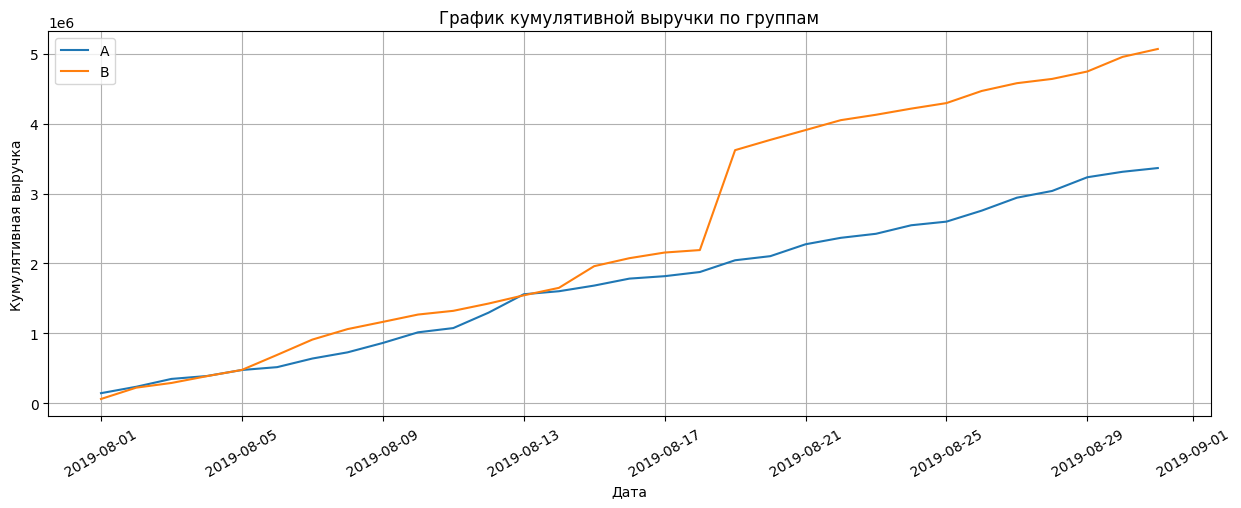

In [34]:
#построим график кумулятивной выручки по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=30)
plt.grid()
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы В после 17 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## График кумулятивного среднего чека по группам

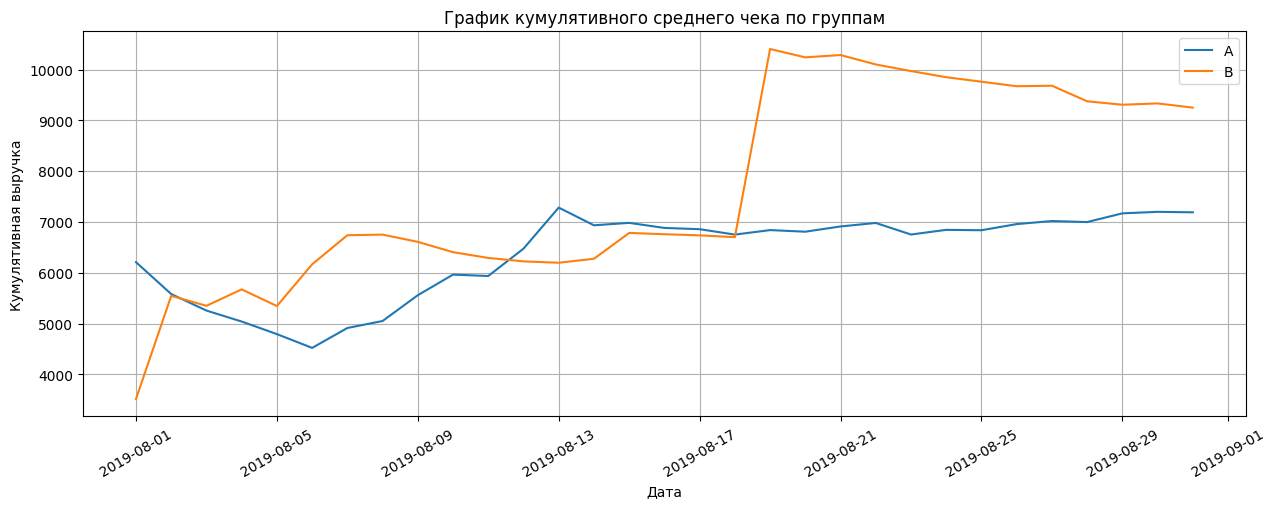

In [35]:
#построим график кумулятивного среднего чека по группам
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=30)
plt.legend()
plt.grid();

Значение среднего чека в целом хаотично. Аналогично предыдущему графику, наблюдается резкое увеличение выручки группы В после 17 августа, однако ее объем еще не стабилизировался и имеется тенденция на дальнейшее снижение. Выручка группы А наоборот, после 13 августа выровнялась и зафиксировалась примерно около значения ~7000 у.е.

## График относительного изменения кумулятивного среднего чека группы B к группе A

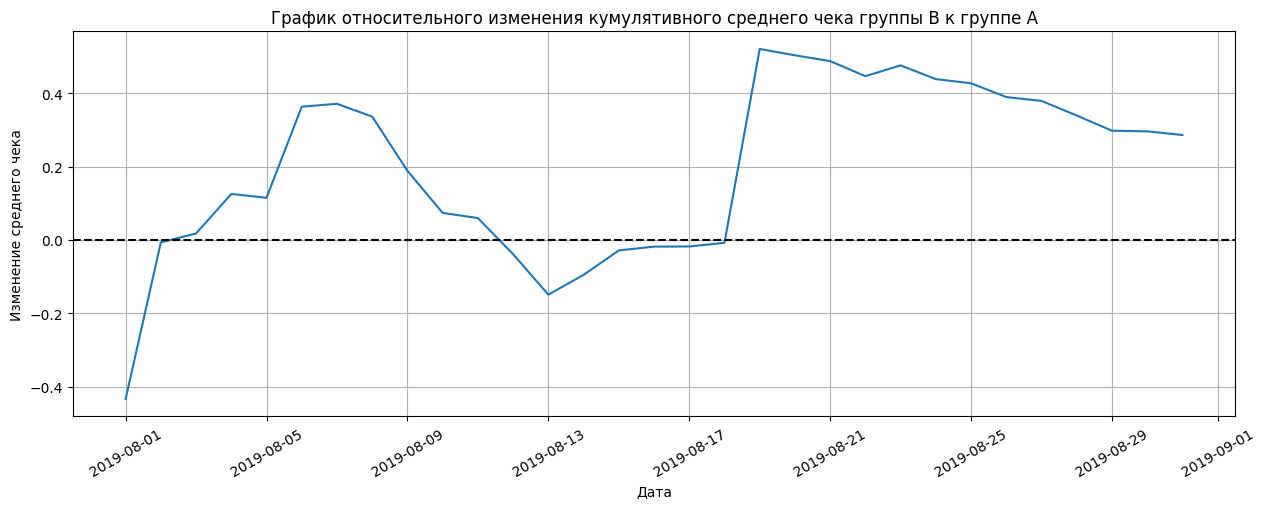

In [36]:
#построим график относительного изменения кумулятивного среднего чека группы B к группе A
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.xticks(rotation=30); 

В нескольких точках график относительного изменения кумулятивного среднего чека группы B к группе A резко «скачет». Как раз в эти периоды на предыдущих графиках наблюдалось увеличение выручки группы B. Данные "всплески" также свидетельствуют о наличии крупных заказов или о выбросах.

## График кумулятивного среднего количества заказов на посетителя по группам

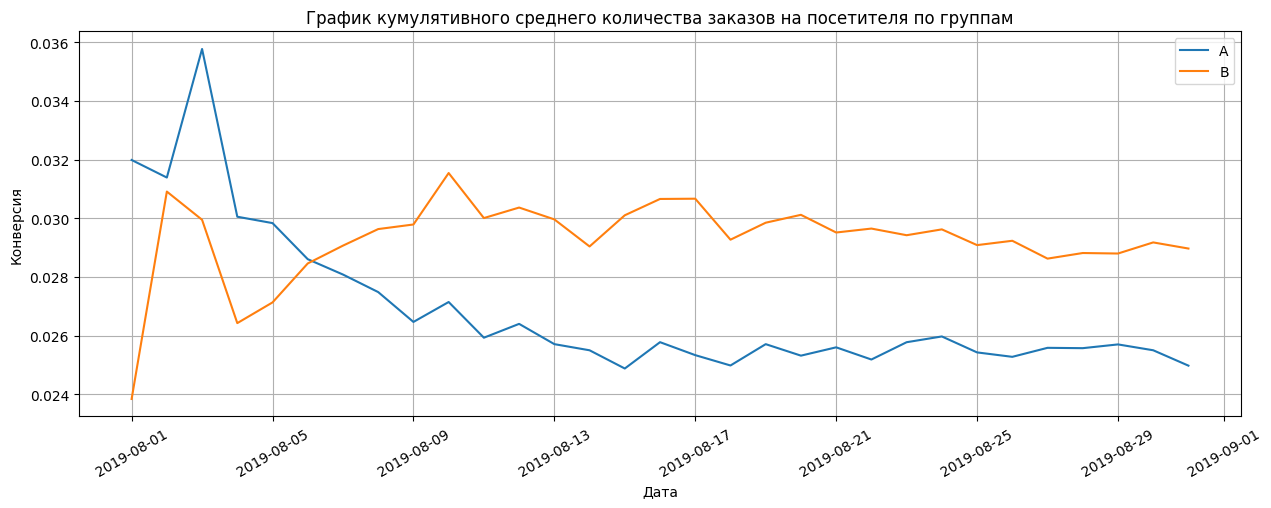

In [37]:
#построим график кумулятивного среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.legend()
plt.grid();

Среднее количество заказов группы А с 1 по 6 августа было значительно выше, чем у группы В. Однако после 6 августа наблюдается обратная ситуация, среднее количество заказов у группы В колебалось в диапазоне 0,028-0,032. Среднее количество заказов у группы А находится в более умеренном диапазоне 0,025-0,027. В целом, получившийся график можно назвать симметричным.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

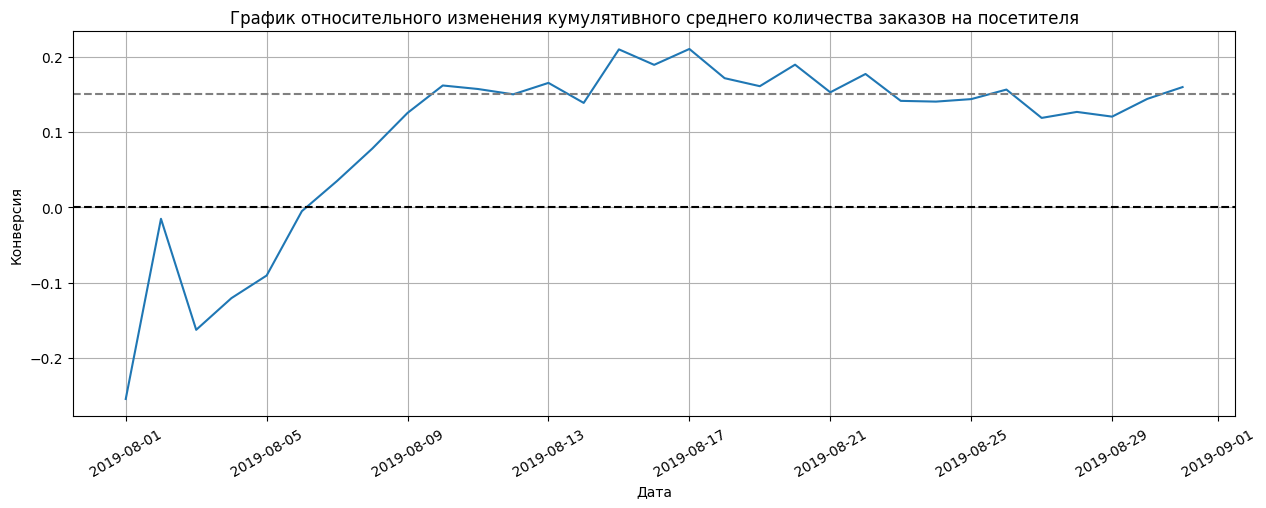

In [38]:
#построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.grid();

Данный график также подтверждает предыдущие выводы. Конверсия группы B лидирует по конверсии. Её прирост в диапазоне составляет ~15-20% относительно группы А.

## Точечный график количества заказов по пользователям

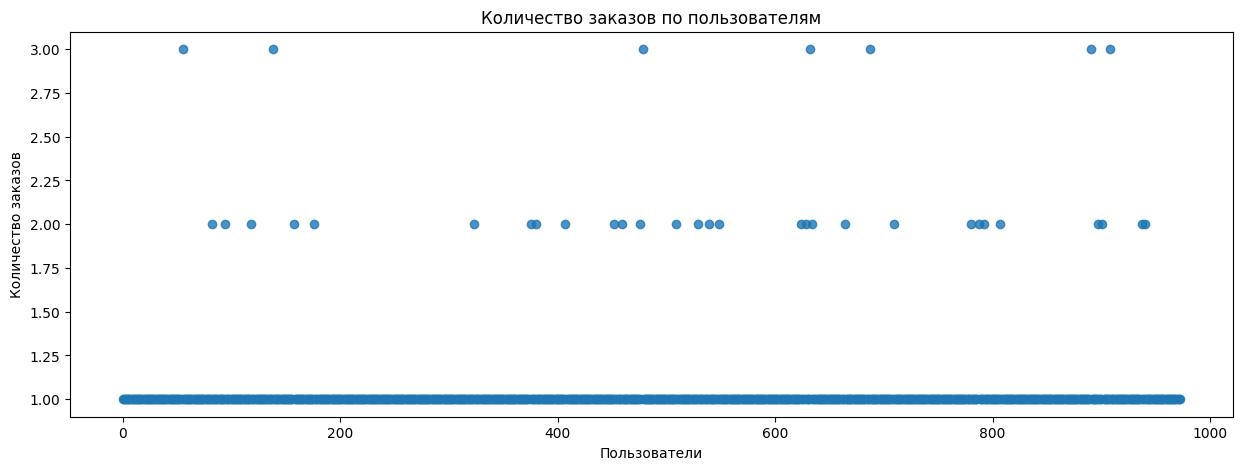

In [39]:
#построим точечный график количества заказов по пользователям
#датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
#display(ordersByUsers['orders'].describe())

#построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.8);

Основная масса пользователей совершила 1 заказ, также значительно меньше тех, кто совершил 2 заказа и более. В таком случае, значения более 2х заказов можно считать единичными выбросами.

## 95-й и 99-й перцентили количества заказов на пользователя

In [40]:
#посчитаем 95-й и 99-й перцентили количества заказов на пользователя
print('95 перцентиль:', np.percentile(ordersByUsers['orders'], [95]))
print('99 перцентиль:', np.percentile(ordersByUsers['orders'], [99]))

95 перцентиль: [1.]
99 перцентиль: [2.]


Лишь 1% пользователей совершили более 2 заказов, поэтому возьмем это значение за границу для определения аномальных пользователей.

## Точечный график стоимостей заказов

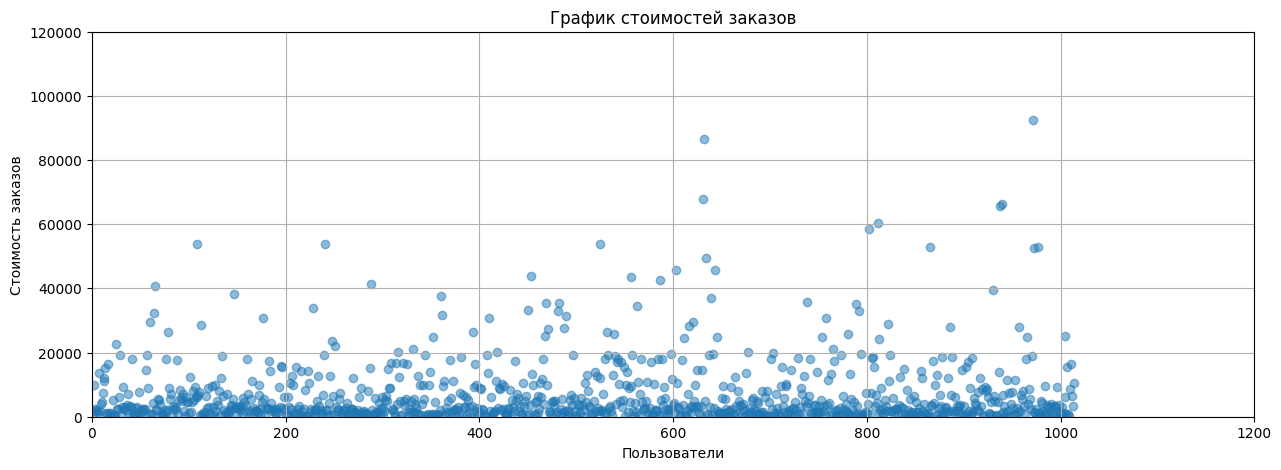

In [41]:
#построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1200, 0, 120000])
plt.grid();

Большая часть заказов не превышает 20000 у.е., также есть некоторое количество дорогих заказов в диапазоне 20000-40000 у.е. Судя по графику, заказы свыше 40000 у.е. можно считать выбросами, однако после расчета процентилей, можно будет провести более четкую границу в данном вопросе.

## 95-й и 99-й перцентили стоимости заказов

In [42]:
#посчитаем 95-й и 99-й перцентили стоимости заказов
print('95 перцентиль:', (np.percentile(orders['revenue'], [95])))
print('99 перцентиль:', (np.percentile(orders['revenue'], [99])))

95 перцентиль: [26785.]
99 перцентиль: [53904.]


Лишь 5% пользователей совершили заказ на сумму больше 26785. Не более 1% пользователей совершили заказ на сумму свыше 53904. Таким образом, границей для определения аномальных заказов будут являться заказы свыше 53904 у.е.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным - без удаления аномальных пользователей

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

cummulative = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#объявим переменные, для пользователей, которые делали хотя бы 1 заказ
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [44]:
#сформулируем гипотезы
#H0 - различий в среднем количестве заказов между группами нет
#H1 - различия в среднем количестве заказов между группами есть

print('alpha =',0.05)
print('p-значение = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-значение = 0.011
0.160


Второе число — p-value = 0.011 меньше 0.05. Чем меньше p-value, тем меньше вероятность допустить ошибку первого рода и при p-value < 0.05 мы не допустим ошибку первого рода, а значит, нулевую гипотезу о том, что значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Относительный прирост среднего количества заказов группы В к группе А равен 16% — третье число в выводе. 

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [45]:
#сформулируем гипотезы
#H0 - различий в среднем количестве заказов между группами нет
#H1 - различия в среднем количестве заказов между группами есть

print('alpha =',0.05)
print('p-значение = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-значение = 0.829
0.287


Второе число — p-value = 0.829 больше 0.05. В данной ситуации мы столкнулись с ошибкой второго рода - ложнонегативным результатом, он указывает на то, что различия между группами А и В есть, но тест показал p-value больше уровня значимости alpha и у нас нет оснований отвергать H₀. Относительный прирост среднего чека заказа между группами по «сырым» данным равен 28,7%.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Предварительно очистим данные от "аномальных выбросов", чтобы они не повлияли на результаты теста. За основу возьмем ранее полученные показатели перцентилей.

In [46]:
#95-й и 99-й перцентили количества заказов на пользователя
print('95 перцентиль:', np.percentile(ordersByUsers['orders'], [95]))
print('99 перцентиль:', np.percentile(ordersByUsers['orders'], [99]))

95 перцентиль: [1.]
99 перцентиль: [2.]


In [47]:
#95-й и 99-й перцентили стоимости заказов
print('95 перцентиль:', (np.percentile(orders['revenue'], [95])))
print('99 перцентиль:', (np.percentile(orders['revenue'], [99])))

95 перцентиль: [26785.]
99 перцентиль: [53904.]


In [48]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
#узнаем, сколько всего аномальных пользователей атрибутом shape
print('Количество аномальных пользователей =',abnormalUsers.shape[0]) 


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cummulative['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
Количество аномальных пользователей = 16


In [49]:
#сформулируем гипотезы
#H0 - различий в среднем количестве заказов между группами нет
#H1 - различия в среднем количестве заказов между группами есть

print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный прирост среднего числа заказов группы B 0.189


Второе число — p-value = 0.007, что меньше 0.05. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть.  
Относительный прирост среднего количества заказов равен 18,9%, что почти на 2,9% больше предыдущего результата. Нулевая гипотеза также отвергнута.

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [50]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.788
-0.032


Второе число — p-value = 0.788, что больше 0.05, но незначительно меньше предыдущего результата на 0,041. Относительный прирост по сравнению с предыдущим результатом практически равен 0, упав с 0,287 до -0,032. В целом, результаты обоих тестов совпадают, оснований отвергать нулевую гипотезу в пользу альтернативной нет. Аномальные заказы убрали и средние чеки сравнялись.

## Решение по результатам теста


Исходя из обнаруженных фактов, A/B-тест для интернет-магазина следует остановить и зафиксировать победу группы В.  
  
**Если говорить о конверсии:**
- Есть статистически значимое различие по среднему количеству заказов между группами как по сырым данным, так и после фильтрации аномалий;
- График различия в среднем количестве заказов между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту;
- Относительный прирост среднего числа заказов группы B по "сырым" данным равен 16%, а по "очищенным" данным 18.9%.  

**Если говорить о среднем чеке:**
- Графики, показывающие изменения кумулятивного среднего чека между группами говорят о том, что результаты группы B выше результатов группы A. У группы В наблюдалось увеличение выручки, засчет крупных заказов;
- Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Из-за влияния аномально крупных заказов, средний чек в группе B выше на 28,7% среднего чека группы A по неочищенным данным, и практически равен между двумя группами при очищенных данных.
  
Таким образом, группа B статистически лучше группы A по показателям конверсии, но ярко-выраженных различий в средних чеках между группами А и В по итогу нет.

# Общий вывод

1. Приоритизация гипотез очень важна. Она помогает понять, что следует выполнять в первую очередь, чтобы донести до пользователя максимум ценности, улучшить метрики и заработать больше денег для компании. Мы рассмотрели два метода приоритизации гипотез ICE и RICE, обобщили полученные результаты и пришли к следующему бэклогу из гипотез, которые в перспективе способны положительно повлиять на выручку интернет-магазина:  
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (в топе моделей ICE и RICE);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (в топе моделей ICE и RICE);
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (в топе модели RICE).

2. С помощью A/B-теста мы проверили некоторые гипотезы и экспериментально оценили предпочтения посетителей. Чтобы получить статистически значимый результат мы исключили влияние сегментов друг на друга, т.е. сделали так, чтобы каждый пользователь был отнесен строго к одному сегменту.    
Показатели, которые мы хотим улучшить: конверсия и величина среднего чека.  

По итогу теста была зафиксирована победа сегмента В, который показал себя лучше сегмента А по показателям конверсии. Однако различий в средних чеках между сегментами А и В по итогу не выявлено. 

**Исходя из полученных результатов A/B-теста, имеет смысл в первую очередь попробовать доработать сайт интернет-магазина: добавив блоки рекомендаций товаров на сайт интернет магазина, добавив форму подписки на все основные страницы, чтобы повысить конверсию и средний чек заказа.**
